In [114]:
from pmdarima.arima.utils import ndiffs
import pandas as pd
import numpy as np

In [115]:
def read(path):
    return pd.read_csv(path)

In [116]:
path = "WeeklyFinalData.csv"
finalData = read(path)

In [117]:
train = finalData["CCSP"]

### 決定 d 值：要插分幾階 > 1

In [118]:
ndiffs(train, test='adf',max_d=5)

1

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf

### 選擇 AR模型的p值，利用資料集的pacf視覺化圖形來輔助 > 8

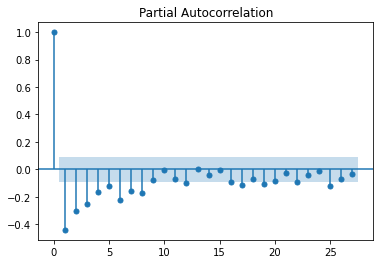

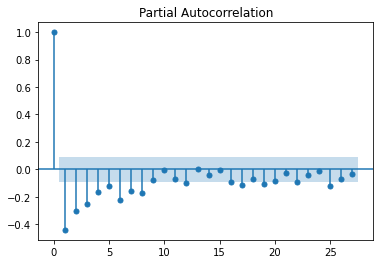

In [123]:
## p = 8
plot_pacf(train.diff().diff().dropna())

### 選擇MA模型的q值,利用資料集的acf視覺化圖形來輔助 > 4

In [121]:
from statsmodels.graphics.tsaplots import plot_acf

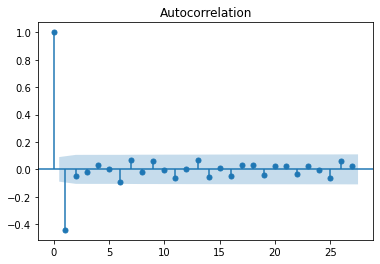

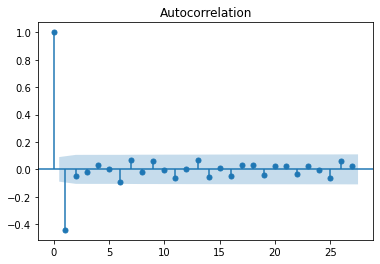

In [122]:
plot_acf(train.diff().diff().dropna())

### Build the model

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [137]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [127]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [128]:
path = "WeeklyFinalData.csv"
finalData = read(path)
X = finalData["CCSP"]
X = X.tolist()

In [129]:
train = [i.item() for i in sc.fit_transform(pd.DataFrame(X[0:size]))]
test = [i.item() for i in sc.transform(pd.DataFrame(X[size:len(X)]))]

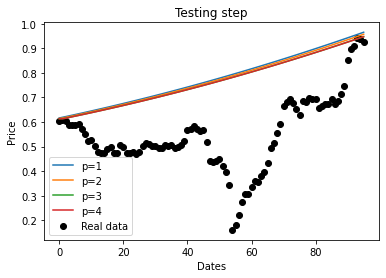

In [145]:
import matplotlib.pyplot as plt
size = int(len(X) * 0.8)
RMSE = list()
predictions = pd.DataFrame()

for p in range(1,5):
    model = ARIMA(history, order=(p,2,1))
    model_fit = model.fit(disp=0)
    fc, se, conf = model_fit.forecast(steps=96)
    predictions["p=%d"%(p)]=fc

plt.scatter(range(len(test)),test, color='black', label = 'Real data')
column = predictions.columns

for i in range(predictions.shape[1]):
    plt.plot(predictions.iloc[:,i], label=column[i])
    RMSE.append(np.sqrt(mean_squared_error(test, predictions.iloc[:,i])))
#     print(predictions.iloc[:,i])
#     print(np.sqrt(mean_squared_error(test, predictions.iloc[:,i])))
    
# for i in range(predictions.shape[1]):
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Testing step')
# plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend()
plt.show()

# print(np.sqrt(mean_squared_error(test, fc)))
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#        print('predicted=%f, expected=%f' % (yhat, obs))
    
#     print(test)
#     error = np.sqrt(mean_squared_error(test, predictions))
#     print("p: %d" %p)
#     print('Test RMSE: %.3f' % error)
#     # plot
#     pyplot.plot(test)
#     pyplot.plot(predictions, color='red')
#     pyplot.show()
    
#     size = int(len(X) * 0.8)
#     train, test = X[0:size], X[size:len(X)]
#     history = [x for x in train]
#     test = [x for x in test]
#     predictions = list()

In [149]:
predictions.iloc[:,1].to_csv("ARIMA.csv", index=False)

In [139]:
RMSE.append(1)

In [140]:
RMSE

[1]

In [150]:
df1 = pd.read_csv("ARIMA.csv")
df2 = pd.read_csv("RMSE.csv")

In [151]:
df1.column = ["ARIMA"]

In [153]:
df2.drop("ARIMA",axis=1, inplace=True)

In [154]:
df2["ARIMA"] = df1

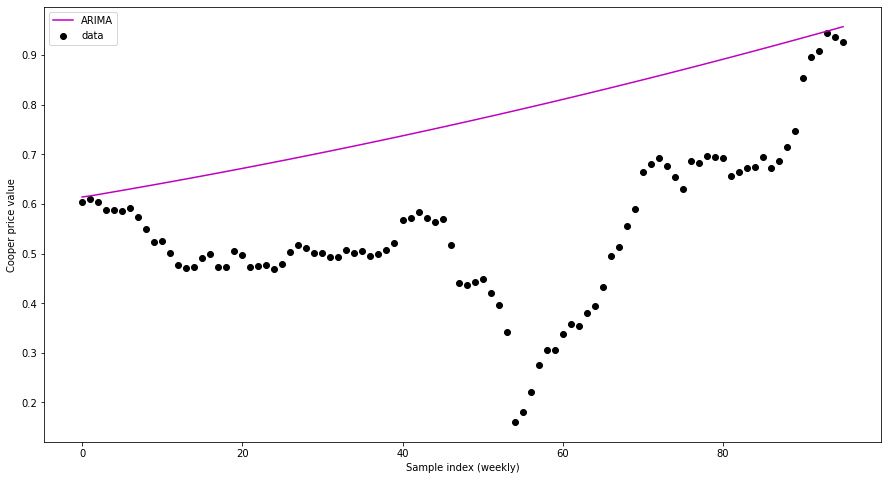

In [163]:
plt.figure(figsize=(15,8))
model_columns = df2.columns

plt.scatter(range(len(test)), test, color='black', label = 'data')
# for i in range(df2.shape[1]):
#     t_data = df2.iloc[:,i]
#     plt.plot(t_data, label=model_columns[i])

plt.plot(df2["ARIMA"], label=model_columns[i], color="m")

plt.legend()
plt.xlabel("Sample index (weekly)")
plt.ylabel("Cooper price value")
plt.savefig('RMSE.png')